In [1]:
import os 
import numpy as np

from ivim_analysis.read_config import get_config
from ivim_analysis.n_patients import NPatients
from ivim_analysis.load_b_example import load_b

Welcome to ivim_analysis version 1.0.0


# Parameter initialization

In [2]:
from datetime import date
from datetime import datetime
patients_info_file, zhaog_path, pickle_ivim_output_path = get_config('../config/config.json')

# 创建输出目录
# 每小时创建一个目录
is_static = True
if is_static:
    current_time = "static"
else:
    current_time = datetime.now().strftime("%Y-%m-%d_%H")
output_dir = f"../output/{current_time}"
# output_dir = f"../output/{date.today()}"
pickle_ivim_output_path = f"{output_dir}/pickled/ivim"
os.makedirs(output_dir, exist_ok=True)
os.makedirs(pickle_ivim_output_path, exist_ok=True)

n_analysis = NPatients.readPatientsInfo(patients_info_file, zhaog_path)

# of patients:  7


In [3]:
# print info
for n in n_analysis:
    print(n_analysis[n].patient_id, end=' ')
    print(n_analysis[n].nii_path)
    print("\tbvals:\t", n_analysis[n].bvals)
    print("\t3 roi:\t", n_analysis[n].circles)

刘伯林 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/刘伯林_10.nii.gz
	bvals:	 [20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0]
	3 roi:	 [[130, 120, 5], [160, 125, 5], [187, 147, 5]]
刘军 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/刘军_11.nii.gz
	bvals:	 [25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
	3 roi:	 [[130, 115, 5], [150, 120, 5], [170, 125, 5]]
孙金鹿 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/孙金鹿_11.nii.gz
	bvals:	 [25, 50, 100, 200, 300, 400, 600, 800, 900, 1000, 0]
	3 roi:	 [[140, 120, 5], [159, 130, 5], [172, 140, 5]]
张喜凤 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/张喜凤_10.nii.gz
	bvals:	 [20, 50, 80, 150, 200, 500, 800, 1000, 1500, 0]
	3 roi:	 [[125, 110, 5], [137, 112, 5], [155, 126, 5]]
徐家恒 /data/users/cyang/acute_pancreatitis/unprocess/bval/ivimap_9_patients/static_IVIM/徐家恒_11.nii.gz
	bvals:	 [25, 50, 100, 200, 300, 400, 600, 8

# Plot

## Plot pancreas

### Plot with roi

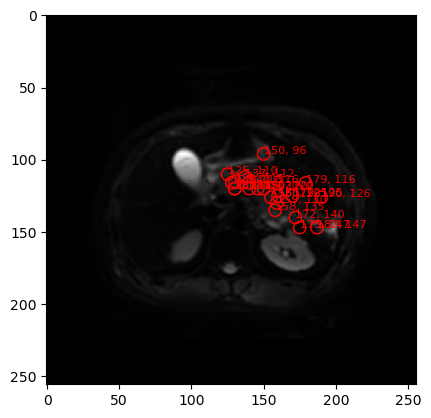

In [4]:
import matplotlib.pyplot as plt
_, ax = plt.subplots()
for name, analysis in n_analysis.items():
    analysis.plot_pancreas_slice(ax, plot_roi=True)

Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented
Warning! Title is not implemented


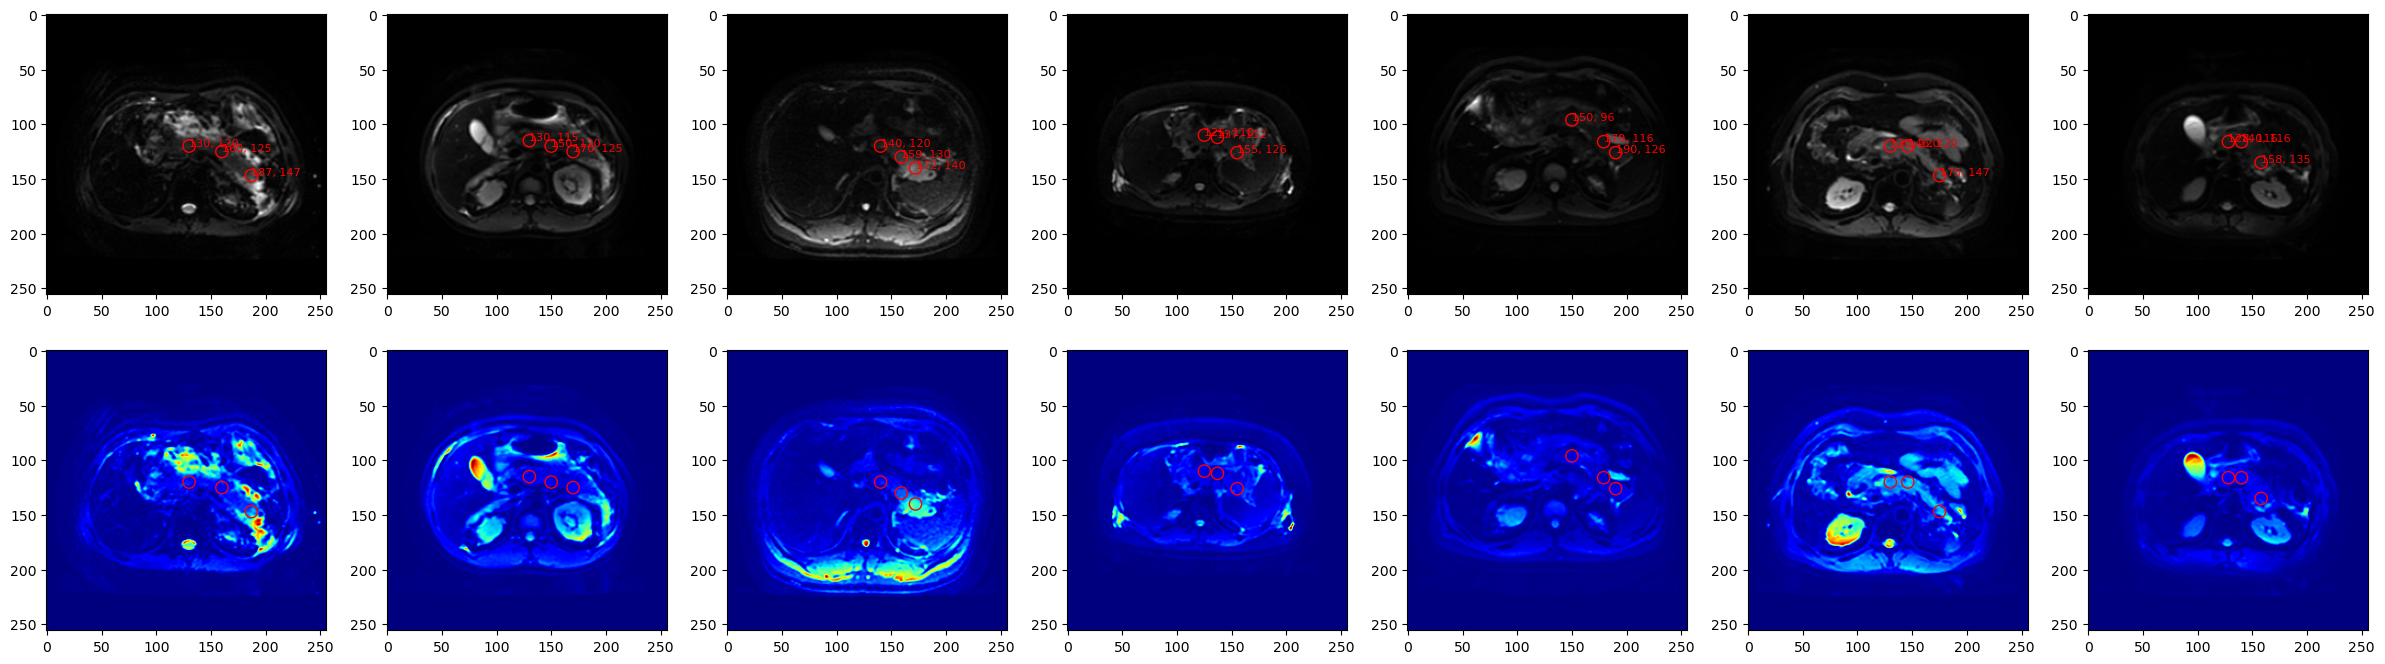

In [5]:
import matplotlib.pyplot as plt

fig_t2, axes_t2 = plt.subplots(2, len(n_analysis), figsize=(30, 8))
for i, n in enumerate(n_analysis):
    n_analysis[n].plot_pancreas_slice(axes_t2[0, i], plot_roi=True, is_title=True)
    n_analysis[n].plot_pancreas_slice(axes_t2[1, i], plot_roi=True, is_text=False, cmap='jet')

all_pan_with_roi = f'{output_dir}/pan_with_roi.png'
plt.savefig(all_pan_with_roi)

### example

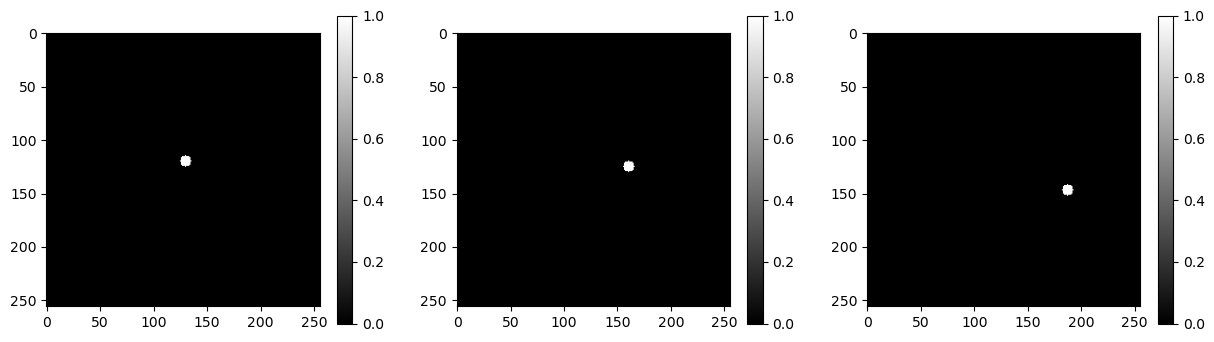

-------------------


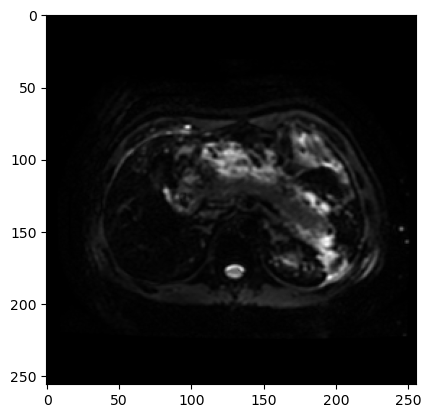

-------------------


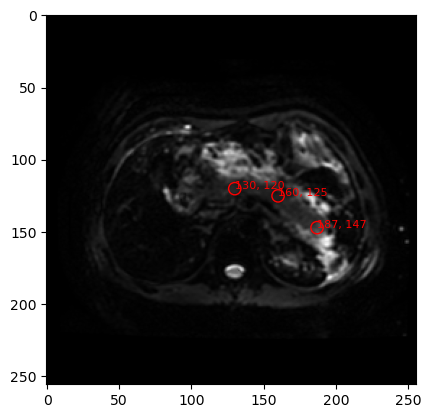

-------------------
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00092286] 6.017820247185039


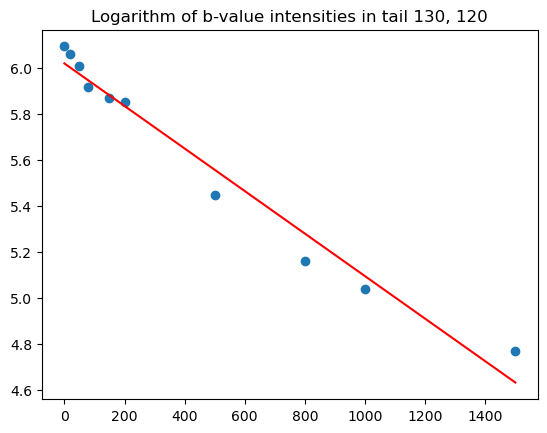

-------------------


In [6]:
tmp = "刘伯林"
tmp_a = n_analysis[tmp]

# plot
tmp_a.plot_mask_roi()
plt.show()
print("-------------------")

# plot
_, ax = plt.subplots()
tmp_a.plot_pancreas_slice(ax)
plt.show()
print("-------------------")

# plot
_, ax = plt.subplots()
tmp_a.plot_pancreas_slice(ax, plot_roi=True)
plt.show()
print("-------------------")

# plot
tmp_a.plot_log_b()
plt.show()
print("-------------------")

### plot each patient with roi

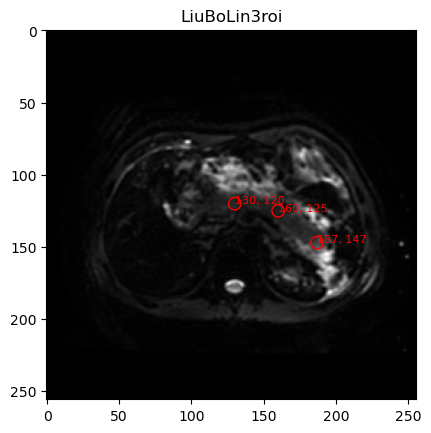

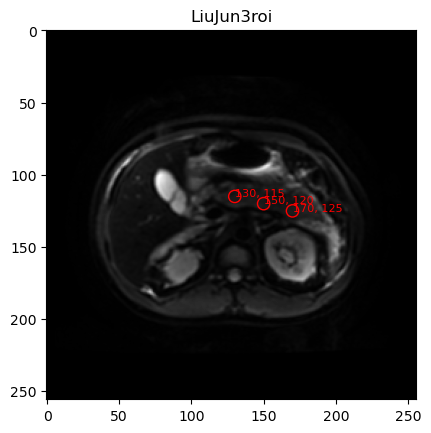

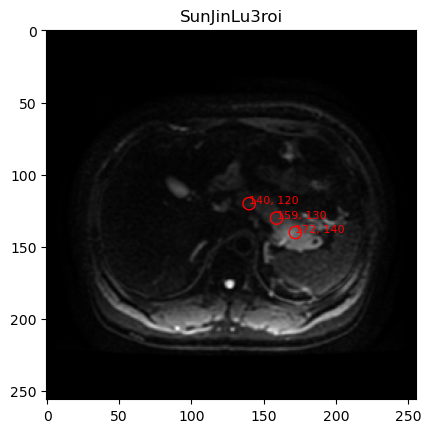

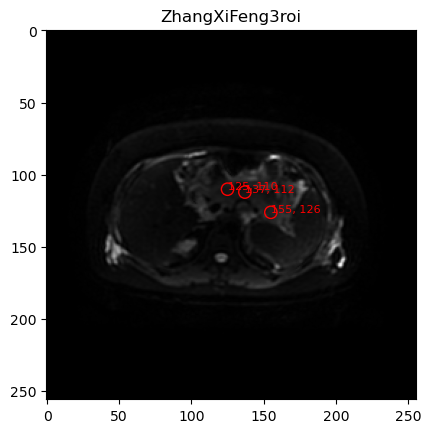

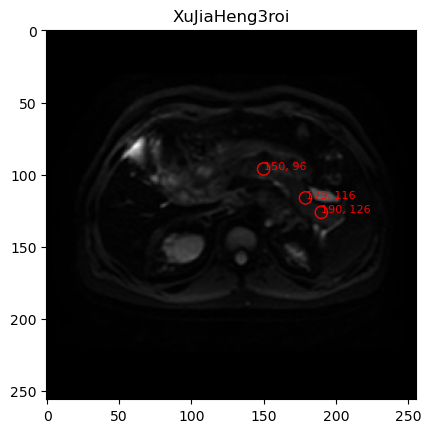

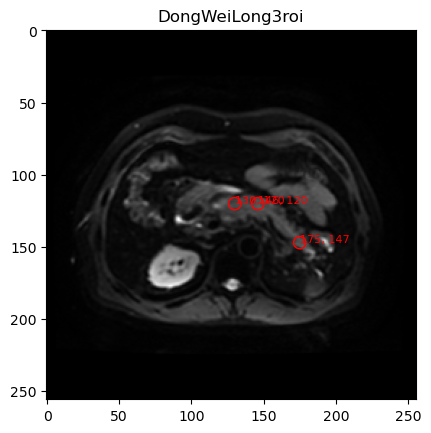

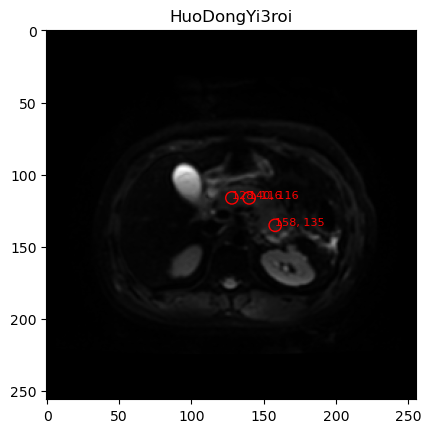

In [7]:
import matplotlib.pyplot as plt
for circles, analysis in n_analysis.items():
    _, ax = plt.subplots()
    analysis.plot_pancreas_slice(ax, plot_roi=True)
    ax.set_title(analysis.patient_name_pinyin + '3roi')

    
    image_path = os.path.join(output_dir, analysis.patient_name_pinyin)
    image_path = os.path.join(image_path, "pancreas_slice_with_3roi.png")
    os.makedirs(os.path.dirname(image_path), exist_ok=True)
    plt.savefig(image_path)

### save log_b

In [8]:
list_roi_name = {"tail":0, "body":1, "head":2}

for name, analysis in n_analysis.items():
    image_path = os.path.join(output_dir, analysis.patient_name_pinyin)
    os.makedirs(image_path, exist_ok=True)

    # analysis.plot_b_intensities()
    # image_path = os.path.join(image_path, "ivim_params.png")
    # plt.savefig("../output/b_intensities.png")
    # plt.show()
    # TODO: multiple roi
    for key, roi in list_roi_name.items():
        analysis.plot_log_b(roi)
        log_b_png = os.path.join(image_path, f"log_b_{key}.png")
        plt.savefig(log_b_png)
        plt.close()

10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00092286] 6.017820247185039
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00090199] 5.931173173188425
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00104704] 6.638594744561641
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00102443] 5.79819587222106
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00118853] 5.843261922634334
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00109437] 5.936359748758639
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00092901] 4.713620601912755
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00104127] 5.349113271340022
11
[   0   25   50  100  200  300  400  600  800  900 1000]
[-0.00104477] 6.055149879556661
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00117171] 5.538868850706972
10
[   0   20   50   80  150  200  500  800 1000 1500]
[-0.00109375] 5.424150268414485
10
[   0   20 

# Run analysis

In [9]:
for i, analysis in n_analysis.items():
    pickle_ivim_path = os.path.join(pickle_ivim_output_path, 'ivim_maps'+analysis.patient_id+'.pkl')
    analysis.run_analysis(load_from_pickle=True, 
                          pickle_ivim_path=pickle_ivim_path,
                          save_ivim_params=True,
                          is_plot=False)

Running analysis for LiuBoLin, saving to ../output/static/pickled/ivim/ivim_maps刘伯林.pkl
Loading LiuBoLin data from pickle file
LiuBoLin Data loaded successfully
IVIM parameters not saved
Running analysis for LiuJun, saving to ../output/static/pickled/ivim/ivim_maps刘军.pkl
Loading LiuJun data from pickle file
LiuJun Data loaded successfully
IVIM parameters not saved
Running analysis for SunJinLu, saving to ../output/static/pickled/ivim/ivim_maps孙金鹿.pkl
Loading SunJinLu data from pickle file
SunJinLu Data loaded successfully
IVIM parameters not saved
Running analysis for ZhangXiFeng, saving to ../output/static/pickled/ivim/ivim_maps张喜凤.pkl
Loading ZhangXiFeng data from pickle file
ZhangXiFeng Data loaded successfully
IVIM parameters not saved
Running analysis for XuJiaHeng, saving to ../output/static/pickled/ivim/ivim_maps徐家恒.pkl
Loading XuJiaHeng data from pickle file
XuJiaHeng Data loaded successfully
IVIM parameters not saved
Running analysis for DongWeiLong, saving to ../output/static

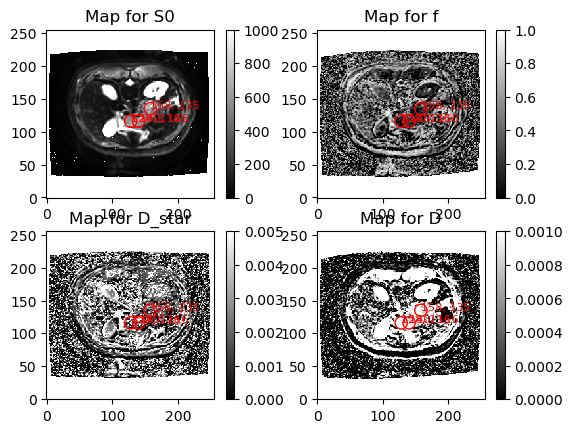

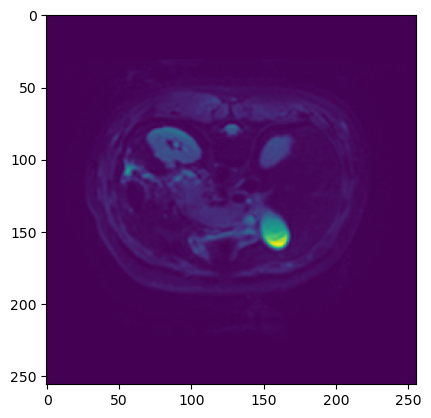

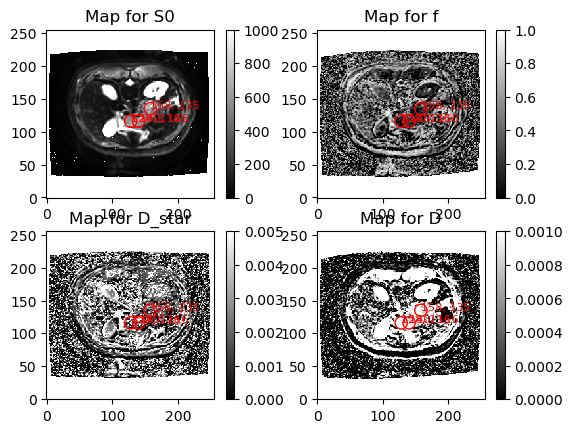

In [10]:
# TODO: rot 180
plt.imshow(np.rot90(np.rot90(analysis.pancreas_slice[:,:,0])))
analysis.plot_ivim()

## Plot the IVIM parameters

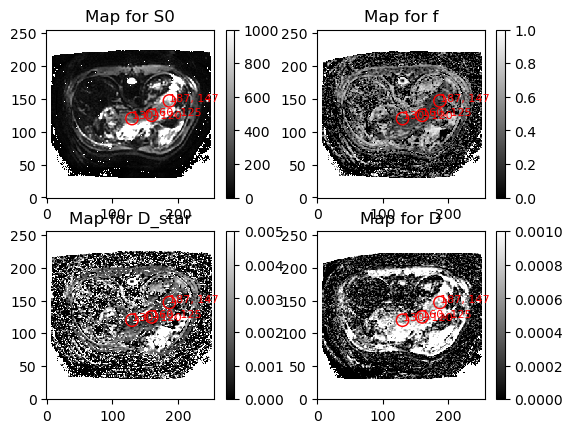

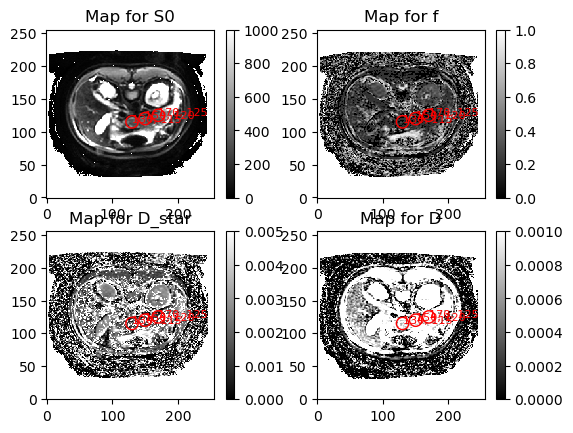

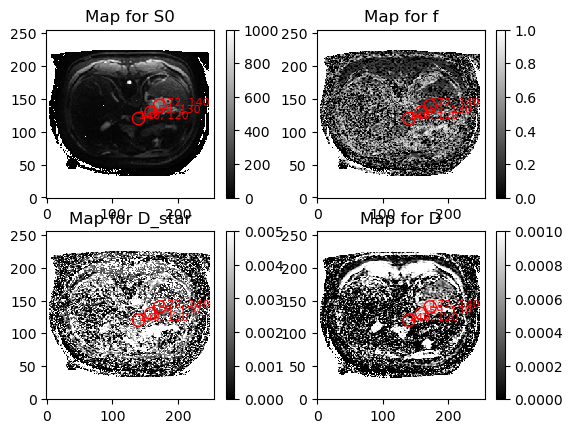

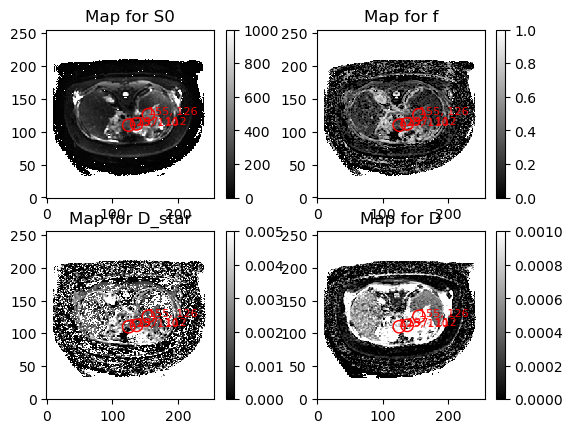

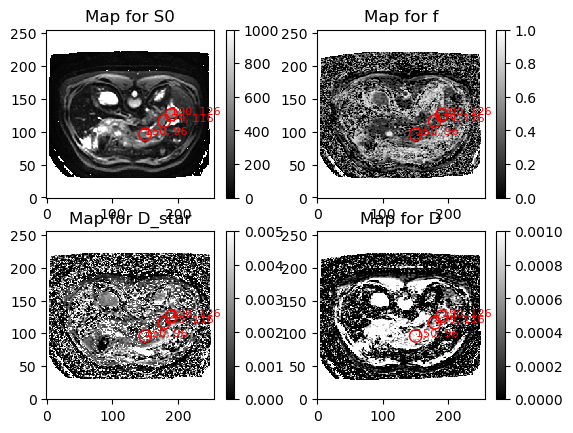

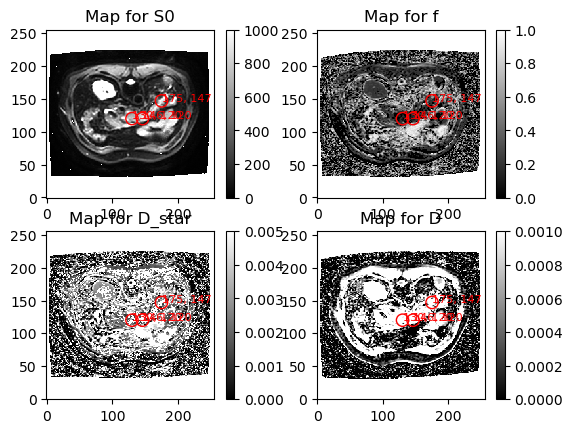

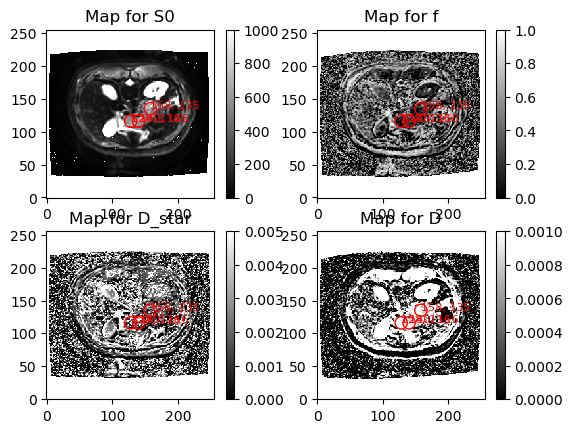

In [11]:
list_fig_ivim = {}
for name, analysis in n_analysis.items():
    list_fig_ivim[analysis.patient_name_pinyin] = analysis.plot_ivim()

# Save fig and pptx

In [12]:
import os
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches

# 保存图片
for i, fig in list_fig_ivim.items():
    image_path = os.path.join(output_dir, i)
    os.makedirs(image_path, exist_ok=True)
    image_path = os.path.join(image_path, "ivim_params.png")
    fig.savefig(image_path)


In [13]:
def add_pic_to_slice(prs, image_path, text=""):
    # 添加幻灯片
    slide_layout = prs.slide_layouts[5]  # 使用空白幻灯片布局
    slide = prs.slides.add_slide(slide_layout)

    # 添加图片到幻灯片
    left = Inches(1)
    top = Inches(1)
    height = Inches(5.5)
    # add text to slide
    slide.shapes.placeholders[0].text = text
    slide.shapes.add_picture(image_path, left, top, height=height)

# 创建 PowerPoint 演示文稿
def generate_pptx():
    prs = Presentation()

    add_pic_to_slice(prs, all_pan_with_roi, text="T2 and ADC")

    for i, _ in list_fig_ivim.items():
        base_output_dir = os.path.join(output_dir, i)
            
        pancreas_slice_path = os.path.join(base_output_dir, "pancreas_slice_with_3roi.png")
        add_pic_to_slice(prs, pancreas_slice_path, text=i)

        # use func
        for key in list_roi_name:
            log_b_png = os.path.join(base_output_dir, f"log_b_{key}.png")
            add_pic_to_slice(prs, log_b_png, text=i)

        image_path = os.path.join(base_output_dir, "ivim_params.png")
        add_pic_to_slice(prs, image_path, text=i)

    # 保存 PowerPoint 文件
    pptx_path = os.path.join(output_dir, "presentation.pptx")
    prs.save(pptx_path)

    print(f"PowerPoint 文件已保存到: {pptx_path}")

generate_pptx()


PowerPoint 文件已保存到: ../output/static/presentation.pptx


# Print para

In [14]:
for name, analysis in n_analysis.items():
    analysis.print_estimated_params_roi(save_ivim_params=True, output_path=f"{output_dir}/{analysis.patient_name_pinyin}")

刘伯林 estimated parameter:
tail:
	S0:		434.353444
	f:		0.281880
	D_star:		0.016186
	D:		0.000670
body:
	S0:		395.172432
	f:		0.213313
	D_star:		0.056918
	D:		0.000745
head:
	S0:		807.988987
	f:		0.241828
	D_star:		0.018680
	D:		0.000853
刘军 estimated parameter:
tail:
	S0:		340.158725
	f:		0.121984
	D_star:		0.026879
	D:		0.000930
body:
	S0:		374.093041
	f:		0.105189
	D_star:		0.259044
	D:		0.001153
head:
	S0:		412.833851
	f:		0.079082
	D_star:		0.287302
	D:		0.001093
孙金鹿 estimated parameter:
tail:
	S0:		130.621003
	f:		0.318529
	D_star:		0.044226
	D:		0.000545
body:
	S0:		245.010737
	f:		0.233171
	D_star:		0.096415
	D:		0.000882
head:
	S0:		468.312738
	f:		0.211154
	D_star:		0.117241
	D:		0.000857
张喜凤 estimated parameter:
tail:
	S0:		276.192553
	f:		0.333914
	D_star:		0.003940
	D:		0.000871
body:
	S0:		243.369492
	f:		0.345859
	D_star:		0.002954
	D:		0.000765
head:
	S0:		436.489061
	f:		0.265913
	D_star:		0.020912
	D:		0.001011
徐家恒 estimated parameter:
tail:
	S0:		467.101584
	f:		0.121365

In [47]:
analysis.dict_ivim_params

{'S0': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'f': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'D_star': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 'D': array([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., 

In [17]:
data = {analysis.patient_name_pinyin: analysis.estimated_params_roi}

In [23]:
import numpy as np
from scipy import stats

# Concatenate the data
S0_values = []
f_values = []
D_star_values = []
D_values = []

for i, analysis in n_analysis.items():
    person = analysis.estimated_params_roi
    S0_values.append([person['tail'][key], person['body']['S0'], person['head']['S0']])
    f_values.extend([person['tail']['f'], person['body']['f'], person['head']['f']])
    D_star_values.extend([person['tail']['D_star'], person['body']['D_star'], person['head']['D_star']])
    D_values.extend([person['tail']['D'], person['body']['D'], person['head']['D']])

# Convert to numpy arrays
S0_array = np.array(S0_values)
f_array = np.array(f_values)
D_star_array = np.array(D_star_values)
D_array = np.array(D_values)

# Perform t-tests (example between S0 and f)
t_stat, p_value = stats.ttest_ind(S0_array, f_array)
print(f"T-test result between S0 and f: t-stat={t_stat}, p-value={p_value}")

T-test result between S0 and f: t-stat=[10.34388884 10.17939555 16.48338789], p-value=[1.04368152e-10 1.46214810e-10 2.78060634e-15]


In [26]:
S0_array.shape

(7, 3)

In [27]:
data = {
    "序号": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "预后": [0, 1, 1, 0, 1, 0, 1, 0, 1, 0],
    "感染": [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    "住院号": [321262, 366558, 10001596, 10003194, 69458, 10064603, 10058587, 10077920, 234772, 10096964],
    "姓名": ["陈鹏", "李春东", "李祯", "张喜凤", "刘伯林", "刘军", "霍东杙", "孙金鹿", "徐家恒", "董维龙"]
}

In [29]:
index = data["姓名"].index("刘伯林")
print(index)

4


In [56]:
import numpy as np
from scipy import stats

# Concatenate the data
S0_values = {"预后": {0: [], 1: []}, "感染": {0: [], 1: []}}
values = {}

for i, analysis in n_analysis.items():
    person = analysis.estimated_params_roi
    index = data["姓名"].index(analysis.patient_id)
    
    for key in person["tail"]:
        group = data["预后"][index]
        S0_values["预后"][group].append([person['tail'][key], person['body'][key], person['head'][key]])
        
        group2 = data["感染"][index]
        S0_values["感染"][group2].append([person['tail'][key], person['body'][key], person['head'][key]])

        values[key] = S0_values

    S0_values = {"预后": {0: [], 1: []}, "感染": {0: [], 1: []}}
# Convert to numpy arrays
# S0_array = np.array(S0_values)
for key1, S0_values in values.items():
    for key, value in S0_values.items():
        for key2, value2 in value.items():
            value[key2] = np.array(value2)
        
values

# # Perform t-tests (example between S0 and f)
# t_stat, p_value = stats.ttest_ind(S0_array, f_array)
# print(f"T-test result between S0 and f: t-stat={t_stat}, p-value={p_value}")

{'S0': {'预后': {0: array([], dtype=float64),
   1: array([[6.07272857e+02, 6.19633035e+02, 6.34416755e+02],
          [5.03724913e-02, 1.20404363e-01, 1.64327107e-01],
          [1.66508356e-01, 1.36307087e-01, 3.59822112e-02],
          [1.09390024e-03, 1.02250606e-03, 9.67362882e-04]])},
  '感染': {0: array([], dtype=float64),
   1: array([[6.07272857e+02, 6.19633035e+02, 6.34416755e+02],
          [5.03724913e-02, 1.20404363e-01, 1.64327107e-01],
          [1.66508356e-01, 1.36307087e-01, 3.59822112e-02],
          [1.09390024e-03, 1.02250606e-03, 9.67362882e-04]])}},
 'f': {'预后': {0: array([], dtype=float64),
   1: array([[6.07272857e+02, 6.19633035e+02, 6.34416755e+02],
          [5.03724913e-02, 1.20404363e-01, 1.64327107e-01],
          [1.66508356e-01, 1.36307087e-01, 3.59822112e-02],
          [1.09390024e-03, 1.02250606e-03, 9.67362882e-04]])},
  '感染': {0: array([], dtype=float64),
   1: array([[6.07272857e+02, 6.19633035e+02, 6.34416755e+02],
          [5.03724913e-02, 1.204043

In [61]:
import numpy as np
from scipy import stats

# Assuming `n_analysis` and `data` are already defined
# Initialize a dictionary to hold the S0 values for "预后" and "感染" groups
values = {}

for i, analysis in n_analysis.items():
    person = analysis.estimated_params_roi
    index = data["姓名"].index(analysis.patient_id)  # Find the person's index in the data

    # Initialize a dictionary for each patient's data
    for key in person["tail"]:
        group_yu_hou = data["预后"][index]  # Group based on 预后 (outcome)
        group_gan_ran = data["感染"][index]  # Group based on 感染 (infection)

        # Append the values for each part (tail, body, head) to their respective groups
        if key not in values:
            values[key] = {"预后": {0: [], 1: []}, "感染": {0: [], 1: []}}

        # Add "tail", "body", "head" for both "预后" and "感染" groups
        values[key]["预后"][group_yu_hou].append([person['tail'][key], person['body'][key], person['head'][key]])
        values[key]["感染"][group_gan_ran].append([person['tail'][key], person['body'][key], person['head'][key]])

# Convert lists to numpy arrays
for key1, S0_values in values.items():
    for group_type, group_values in S0_values.items():
        for group_label, data_list in group_values.items():
            group_values[group_label] = np.array(data_list)

# # Perform t-tests for each key
# for key1, S0_values in values.items():
#     print(f"\nPerforming t-tests for parameter: {key1}")
    
#     for group_type, group_values in S0_values.items():
#         group_0 = group_values[0]
#         group_1 = group_values[1]

#         # Perform the t-test between the two groups (0 and 1)
#         t_stat, p_value = stats.ttest_ind(group_0, group_1)

#         print(f"T-test result for {group_type}: t-stat={t_stat:.3f}, p-value={p_value:.3e}")

values

{'S0': {'预后': {0: array([[340.15872515, 374.09304116, 412.83385094],
          [130.62100284, 245.01073677, 468.31273849],
          [276.19255337, 243.3694918 , 436.48906139],
          [701.44336531, 803.85779612, 799.91777753]]),
   1: array([[434.35344357, 395.17243241, 807.98898696],
          [467.10158443, 378.42887355, 507.74977049],
          [607.27285745, 619.63303511, 634.41675525]])},
  '感染': {0: array([[340.15872515, 374.09304116, 412.83385094],
          [130.62100284, 245.01073677, 468.31273849],
          [276.19255337, 243.3694918 , 436.48906139],
          [701.44336531, 803.85779612, 799.91777753]]),
   1: array([[434.35344357, 395.17243241, 807.98898696],
          [467.10158443, 378.42887355, 507.74977049],
          [607.27285745, 619.63303511, 634.41675525]])}},
 'f': {'预后': {0: array([[0.12198422, 0.10518924, 0.0790815 ],
          [0.3185291 , 0.23317089, 0.21115439],
          [0.33391429, 0.34585879, 0.26591272],
          [0.1239452 , 0.12249592, 0.18524142

{0: array([[340.15872515, 374.09304116, 412.83385094],
       [130.62100284, 245.01073677, 468.31273849],
       [276.19255337, 243.3694918 , 436.48906139],
       [701.44336531, 803.85779612, 799.91777753]]), 1: array([[434.35344357, 395.17243241, 807.98898696],
       [467.10158443, 378.42887355, 507.74977049],
       [607.27285745, 619.63303511, 634.41675525]])}


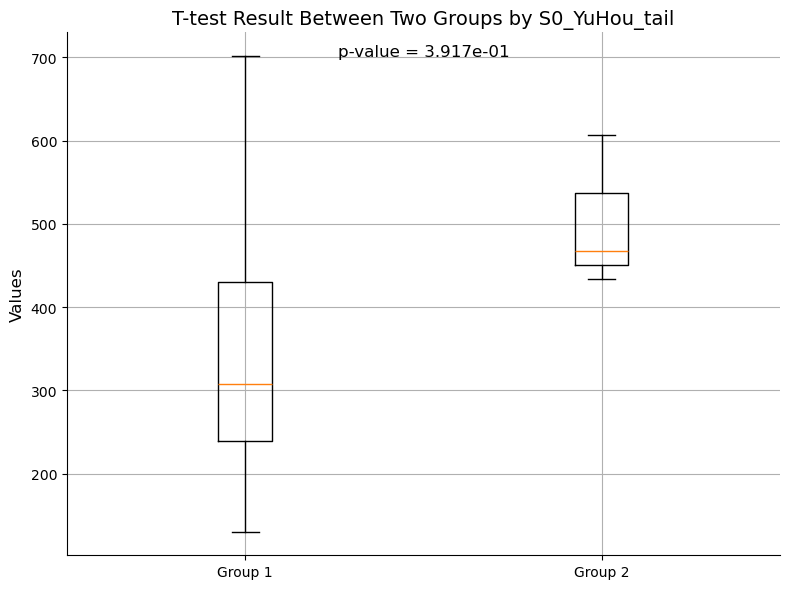

{0: array([[340.15872515, 374.09304116, 412.83385094],
       [130.62100284, 245.01073677, 468.31273849],
       [276.19255337, 243.3694918 , 436.48906139],
       [701.44336531, 803.85779612, 799.91777753]]), 1: array([[434.35344357, 395.17243241, 807.98898696],
       [467.10158443, 378.42887355, 507.74977049],
       [607.27285745, 619.63303511, 634.41675525]])}


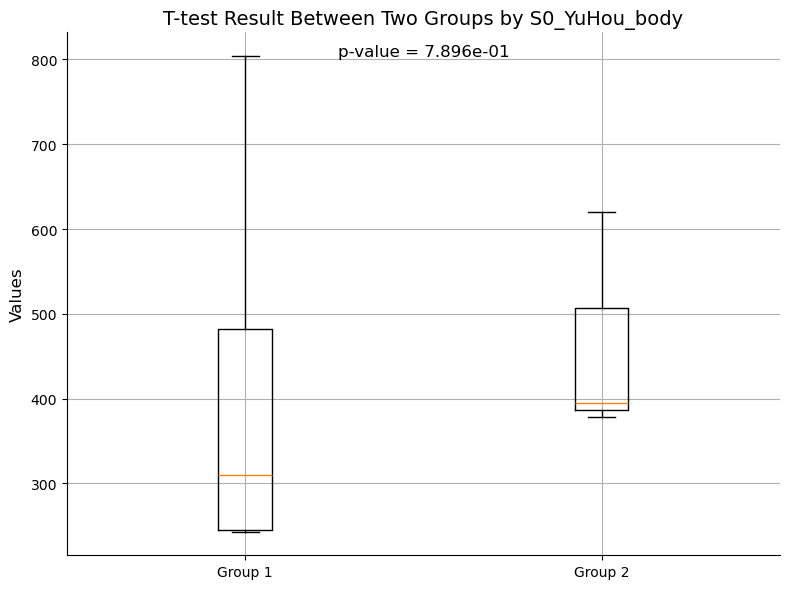

{0: array([[340.15872515, 374.09304116, 412.83385094],
       [130.62100284, 245.01073677, 468.31273849],
       [276.19255337, 243.3694918 , 436.48906139],
       [701.44336531, 803.85779612, 799.91777753]]), 1: array([[434.35344357, 395.17243241, 807.98898696],
       [467.10158443, 378.42887355, 507.74977049],
       [607.27285745, 619.63303511, 634.41675525]])}


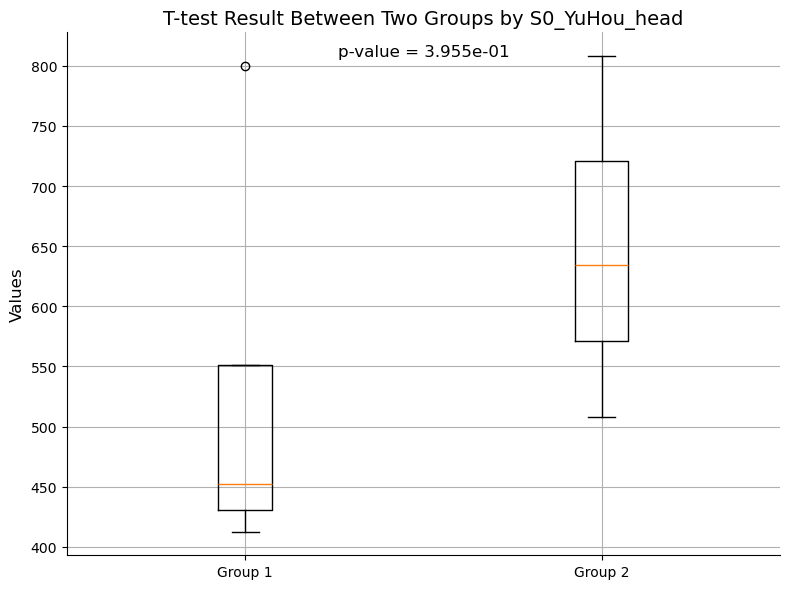

{0: array([[340.15872515, 374.09304116, 412.83385094],
       [130.62100284, 245.01073677, 468.31273849],
       [276.19255337, 243.3694918 , 436.48906139],
       [701.44336531, 803.85779612, 799.91777753]]), 1: array([[434.35344357, 395.17243241, 807.98898696],
       [467.10158443, 378.42887355, 507.74977049],
       [607.27285745, 619.63303511, 634.41675525]])}


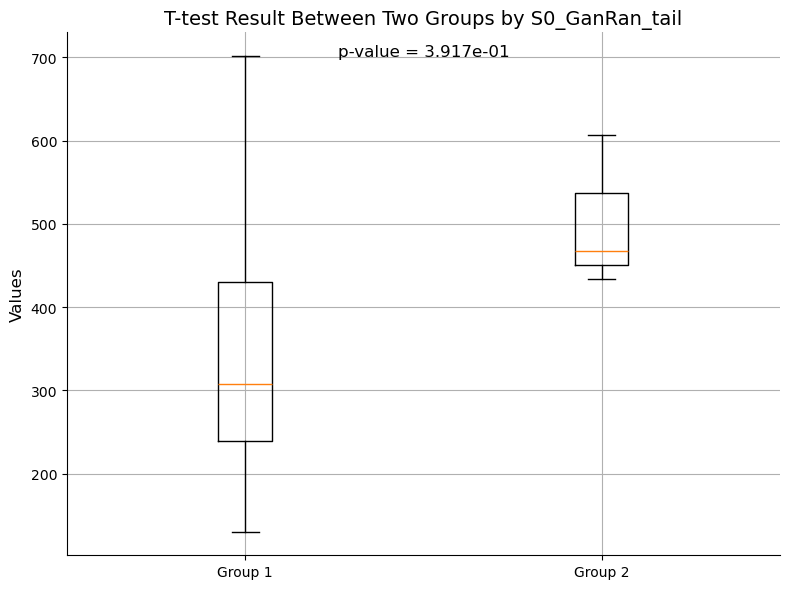

{0: array([[340.15872515, 374.09304116, 412.83385094],
       [130.62100284, 245.01073677, 468.31273849],
       [276.19255337, 243.3694918 , 436.48906139],
       [701.44336531, 803.85779612, 799.91777753]]), 1: array([[434.35344357, 395.17243241, 807.98898696],
       [467.10158443, 378.42887355, 507.74977049],
       [607.27285745, 619.63303511, 634.41675525]])}


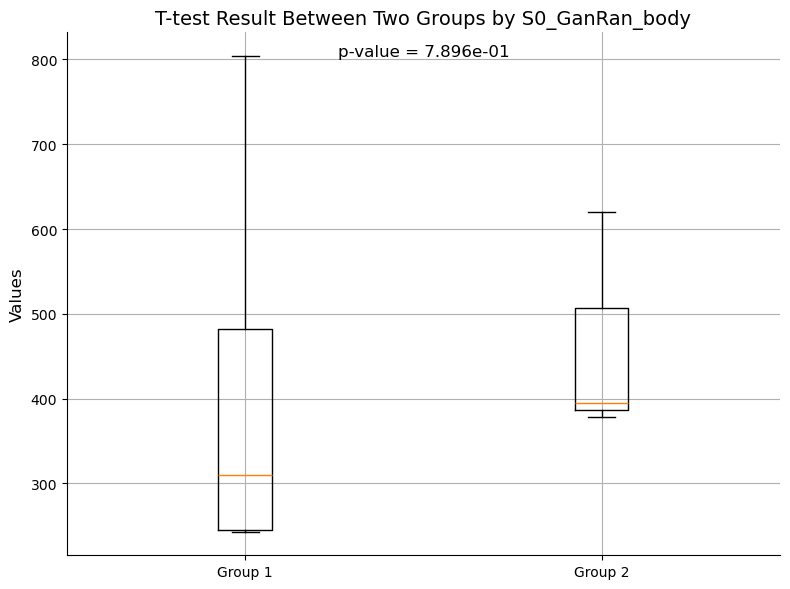

{0: array([[340.15872515, 374.09304116, 412.83385094],
       [130.62100284, 245.01073677, 468.31273849],
       [276.19255337, 243.3694918 , 436.48906139],
       [701.44336531, 803.85779612, 799.91777753]]), 1: array([[434.35344357, 395.17243241, 807.98898696],
       [467.10158443, 378.42887355, 507.74977049],
       [607.27285745, 619.63303511, 634.41675525]])}


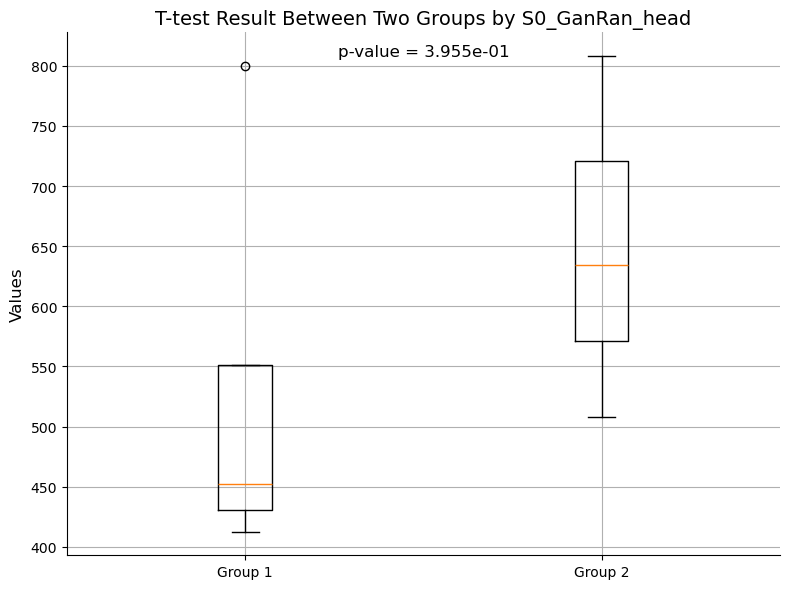

{0: array([[0.12198422, 0.10518924, 0.0790815 ],
       [0.3185291 , 0.23317089, 0.21115439],
       [0.33391429, 0.34585879, 0.26591272],
       [0.1239452 , 0.12249592, 0.18524142]]), 1: array([[0.28187972, 0.21331287, 0.24182839],
       [0.12136538, 0.25497302, 0.2846302 ],
       [0.05037249, 0.12040436, 0.16432711]])}


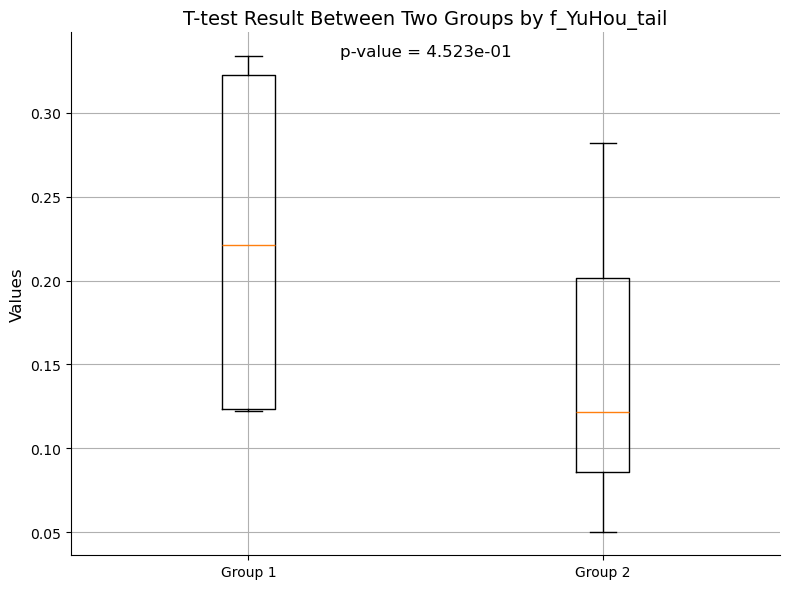

{0: array([[0.12198422, 0.10518924, 0.0790815 ],
       [0.3185291 , 0.23317089, 0.21115439],
       [0.33391429, 0.34585879, 0.26591272],
       [0.1239452 , 0.12249592, 0.18524142]]), 1: array([[0.28187972, 0.21331287, 0.24182839],
       [0.12136538, 0.25497302, 0.2846302 ],
       [0.05037249, 0.12040436, 0.16432711]])}


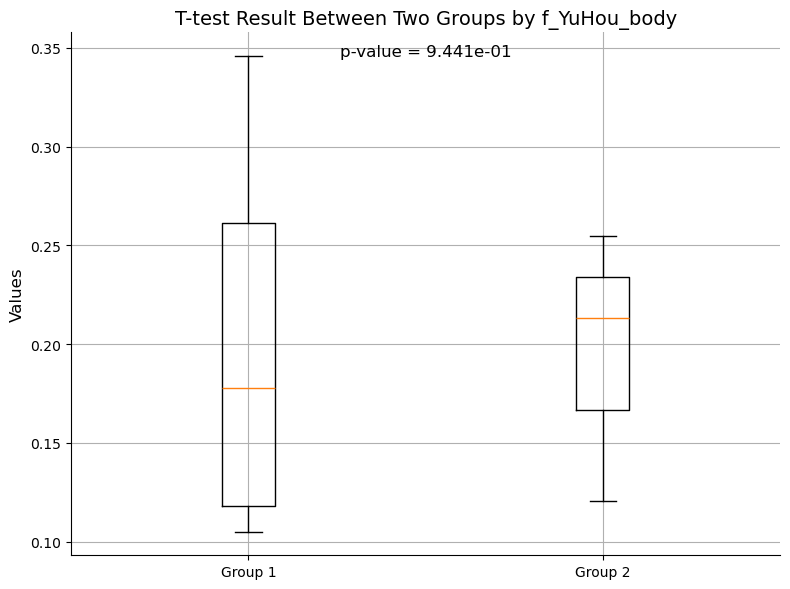

{0: array([[0.12198422, 0.10518924, 0.0790815 ],
       [0.3185291 , 0.23317089, 0.21115439],
       [0.33391429, 0.34585879, 0.26591272],
       [0.1239452 , 0.12249592, 0.18524142]]), 1: array([[0.28187972, 0.21331287, 0.24182839],
       [0.12136538, 0.25497302, 0.2846302 ],
       [0.05037249, 0.12040436, 0.16432711]])}


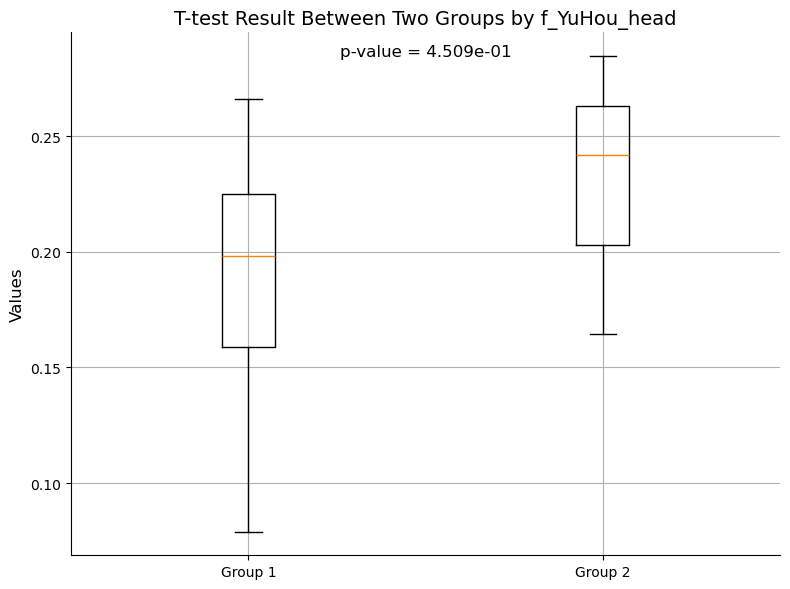

{0: array([[0.12198422, 0.10518924, 0.0790815 ],
       [0.3185291 , 0.23317089, 0.21115439],
       [0.33391429, 0.34585879, 0.26591272],
       [0.1239452 , 0.12249592, 0.18524142]]), 1: array([[0.28187972, 0.21331287, 0.24182839],
       [0.12136538, 0.25497302, 0.2846302 ],
       [0.05037249, 0.12040436, 0.16432711]])}


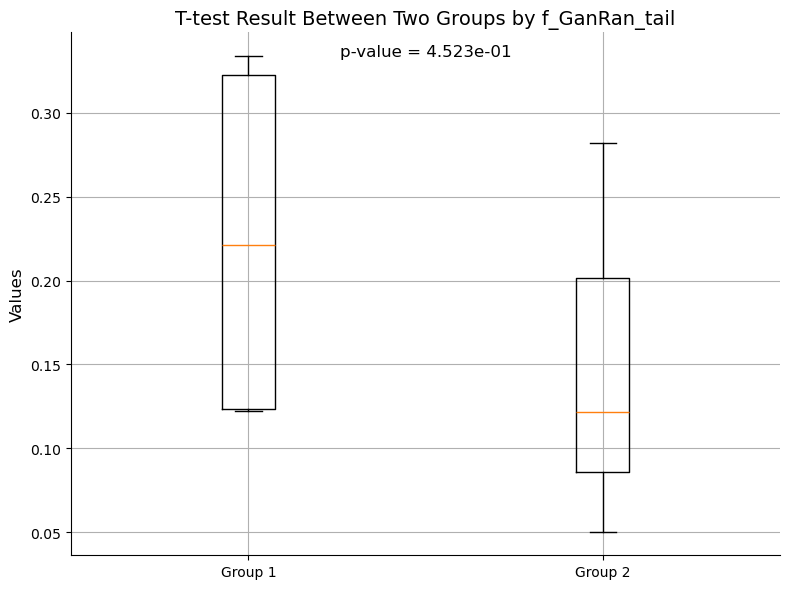

{0: array([[0.12198422, 0.10518924, 0.0790815 ],
       [0.3185291 , 0.23317089, 0.21115439],
       [0.33391429, 0.34585879, 0.26591272],
       [0.1239452 , 0.12249592, 0.18524142]]), 1: array([[0.28187972, 0.21331287, 0.24182839],
       [0.12136538, 0.25497302, 0.2846302 ],
       [0.05037249, 0.12040436, 0.16432711]])}


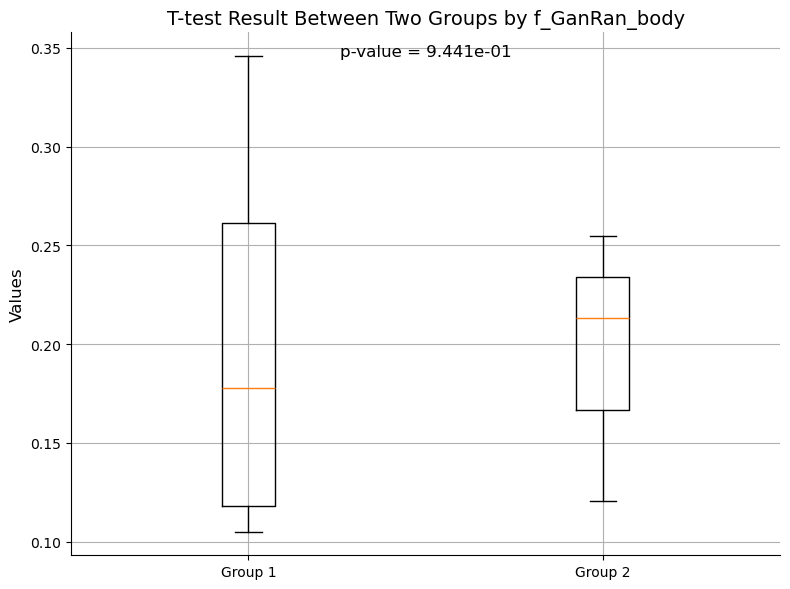

{0: array([[0.12198422, 0.10518924, 0.0790815 ],
       [0.3185291 , 0.23317089, 0.21115439],
       [0.33391429, 0.34585879, 0.26591272],
       [0.1239452 , 0.12249592, 0.18524142]]), 1: array([[0.28187972, 0.21331287, 0.24182839],
       [0.12136538, 0.25497302, 0.2846302 ],
       [0.05037249, 0.12040436, 0.16432711]])}


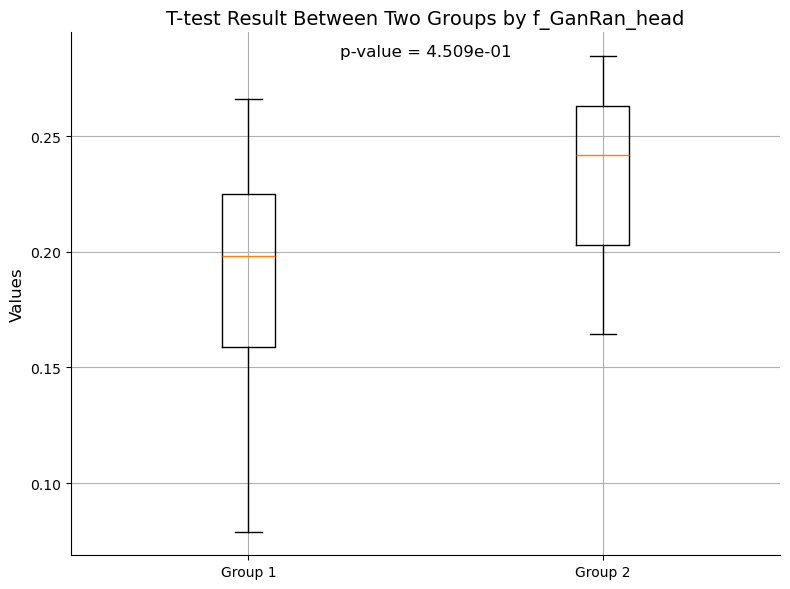

{0: array([[0.0268787 , 0.25904383, 0.2873017 ],
       [0.04422623, 0.09641522, 0.11724111],
       [0.00393989, 0.00295412, 0.02091236],
       [0.01365464, 0.04790914, 0.06223689]]), 1: array([[0.01618612, 0.05691832, 0.01867974],
       [0.2932686 , 0.06342904, 0.13813523],
       [0.16650836, 0.13630709, 0.03598221]])}


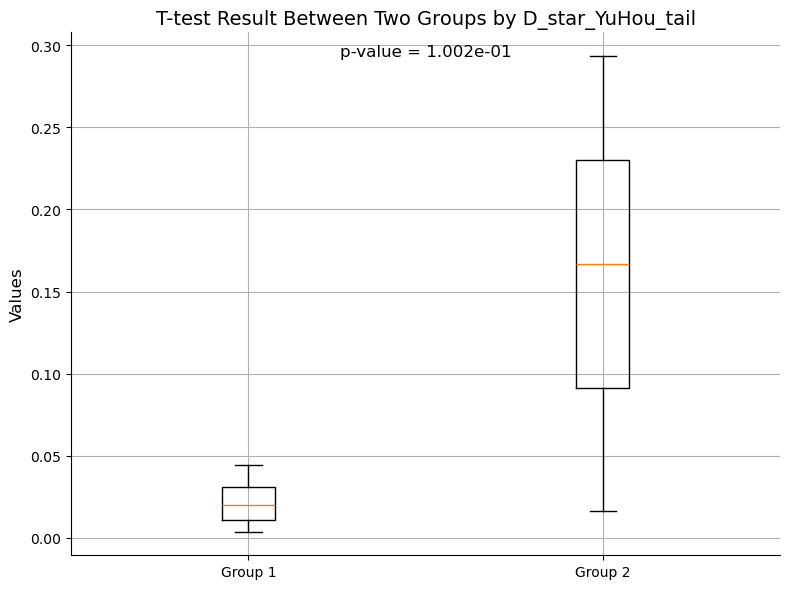

{0: array([[0.0268787 , 0.25904383, 0.2873017 ],
       [0.04422623, 0.09641522, 0.11724111],
       [0.00393989, 0.00295412, 0.02091236],
       [0.01365464, 0.04790914, 0.06223689]]), 1: array([[0.01618612, 0.05691832, 0.01867974],
       [0.2932686 , 0.06342904, 0.13813523],
       [0.16650836, 0.13630709, 0.03598221]])}


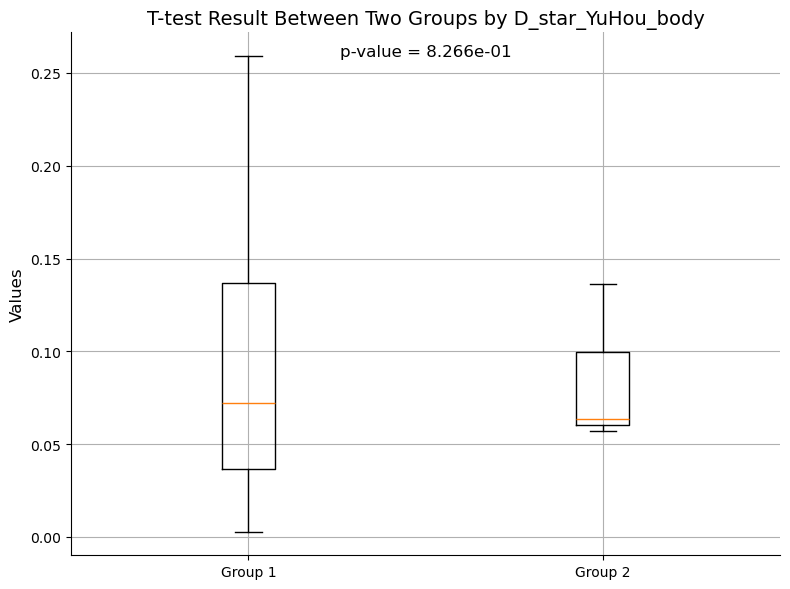

{0: array([[0.0268787 , 0.25904383, 0.2873017 ],
       [0.04422623, 0.09641522, 0.11724111],
       [0.00393989, 0.00295412, 0.02091236],
       [0.01365464, 0.04790914, 0.06223689]]), 1: array([[0.01618612, 0.05691832, 0.01867974],
       [0.2932686 , 0.06342904, 0.13813523],
       [0.16650836, 0.13630709, 0.03598221]])}


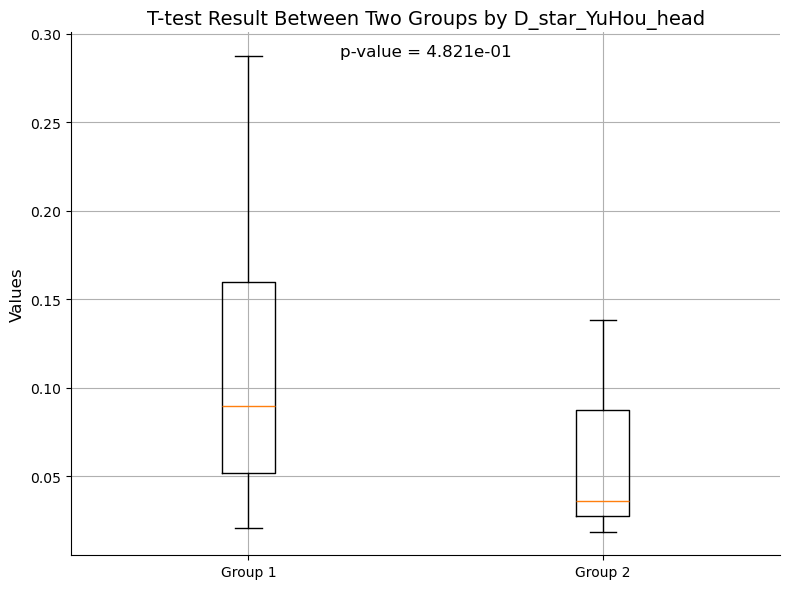

{0: array([[0.0268787 , 0.25904383, 0.2873017 ],
       [0.04422623, 0.09641522, 0.11724111],
       [0.00393989, 0.00295412, 0.02091236],
       [0.01365464, 0.04790914, 0.06223689]]), 1: array([[0.01618612, 0.05691832, 0.01867974],
       [0.2932686 , 0.06342904, 0.13813523],
       [0.16650836, 0.13630709, 0.03598221]])}


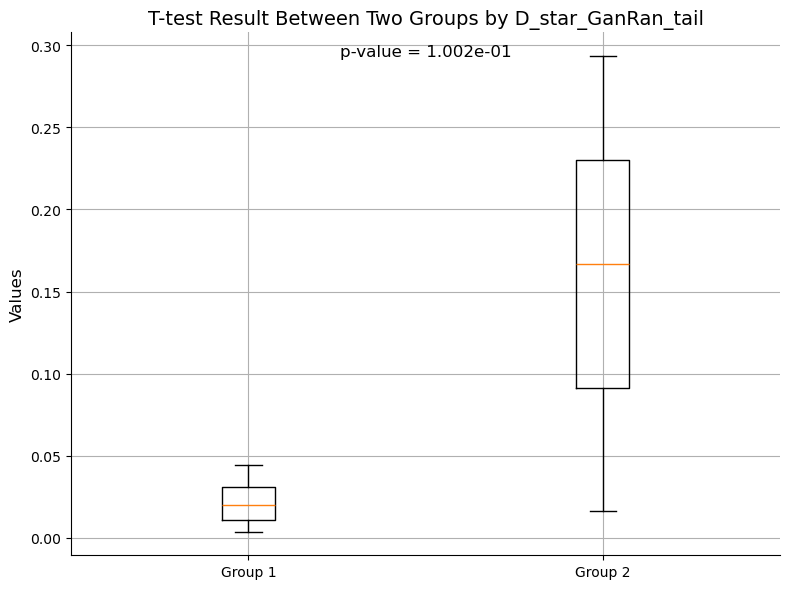

{0: array([[0.0268787 , 0.25904383, 0.2873017 ],
       [0.04422623, 0.09641522, 0.11724111],
       [0.00393989, 0.00295412, 0.02091236],
       [0.01365464, 0.04790914, 0.06223689]]), 1: array([[0.01618612, 0.05691832, 0.01867974],
       [0.2932686 , 0.06342904, 0.13813523],
       [0.16650836, 0.13630709, 0.03598221]])}


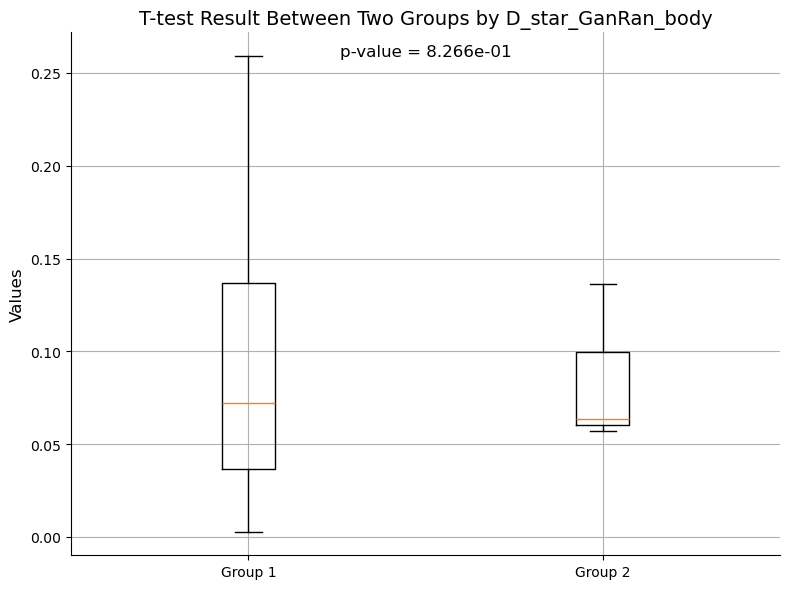

{0: array([[0.0268787 , 0.25904383, 0.2873017 ],
       [0.04422623, 0.09641522, 0.11724111],
       [0.00393989, 0.00295412, 0.02091236],
       [0.01365464, 0.04790914, 0.06223689]]), 1: array([[0.01618612, 0.05691832, 0.01867974],
       [0.2932686 , 0.06342904, 0.13813523],
       [0.16650836, 0.13630709, 0.03598221]])}


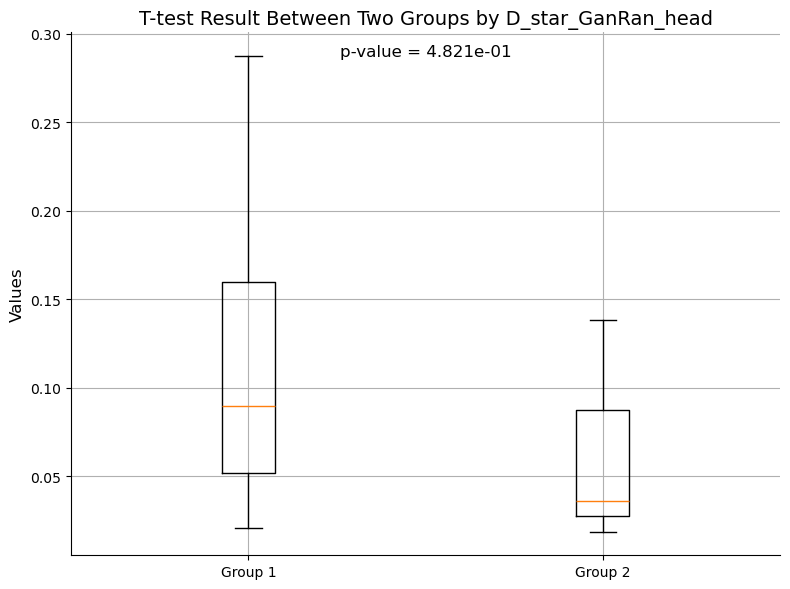

{0: array([[0.00093041, 0.00115262, 0.00109266],
       [0.00054505, 0.00088219, 0.00085687],
       [0.00087102, 0.00076493, 0.00101075],
       [0.00112896, 0.00106984, 0.0012355 ]]), 1: array([[0.00066967, 0.00074452, 0.00085294],
       [0.00113269, 0.0006141 , 0.00070263],
       [0.0010939 , 0.00102251, 0.00096736]])}


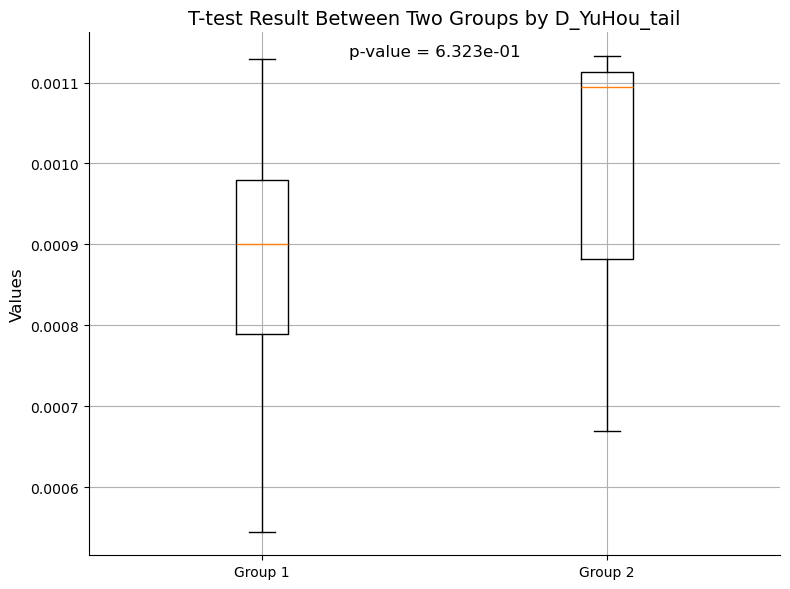

{0: array([[0.00093041, 0.00115262, 0.00109266],
       [0.00054505, 0.00088219, 0.00085687],
       [0.00087102, 0.00076493, 0.00101075],
       [0.00112896, 0.00106984, 0.0012355 ]]), 1: array([[0.00066967, 0.00074452, 0.00085294],
       [0.00113269, 0.0006141 , 0.00070263],
       [0.0010939 , 0.00102251, 0.00096736]])}


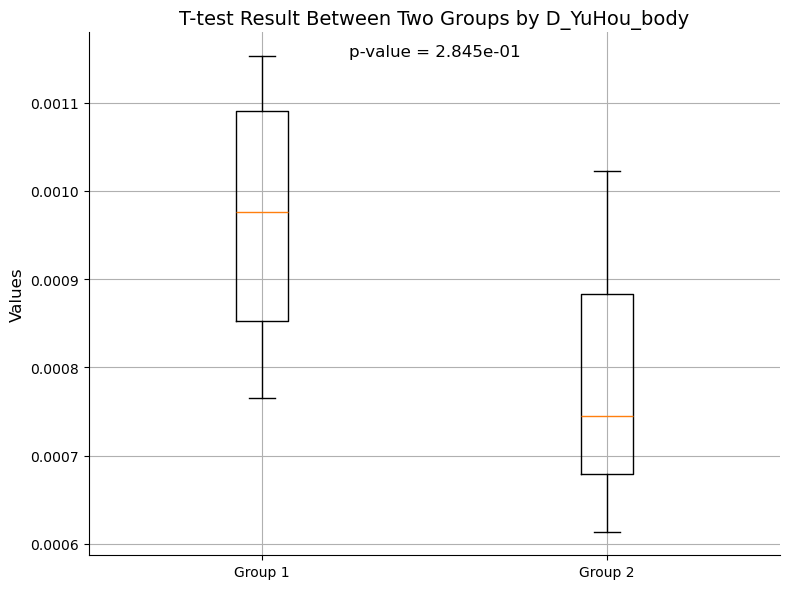

{0: array([[0.00093041, 0.00115262, 0.00109266],
       [0.00054505, 0.00088219, 0.00085687],
       [0.00087102, 0.00076493, 0.00101075],
       [0.00112896, 0.00106984, 0.0012355 ]]), 1: array([[0.00066967, 0.00074452, 0.00085294],
       [0.00113269, 0.0006141 , 0.00070263],
       [0.0010939 , 0.00102251, 0.00096736]])}


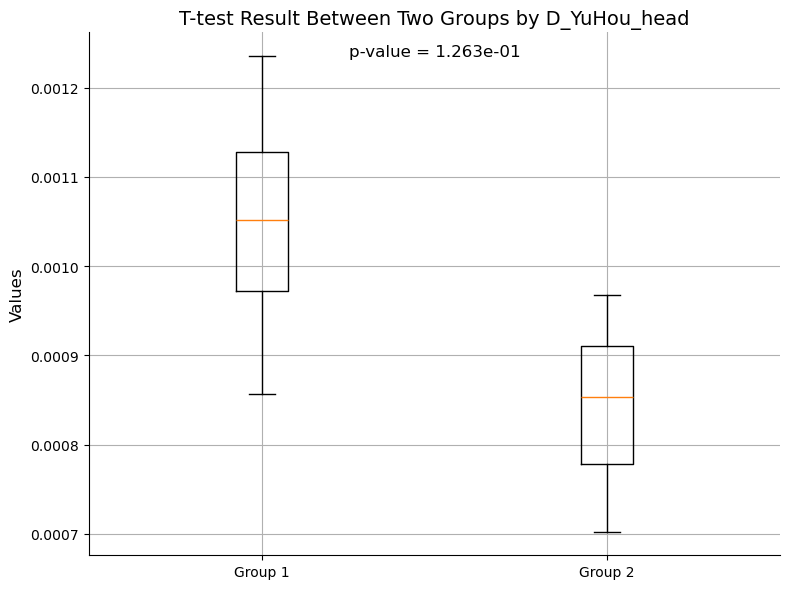

{0: array([[0.00093041, 0.00115262, 0.00109266],
       [0.00054505, 0.00088219, 0.00085687],
       [0.00087102, 0.00076493, 0.00101075],
       [0.00112896, 0.00106984, 0.0012355 ]]), 1: array([[0.00066967, 0.00074452, 0.00085294],
       [0.00113269, 0.0006141 , 0.00070263],
       [0.0010939 , 0.00102251, 0.00096736]])}


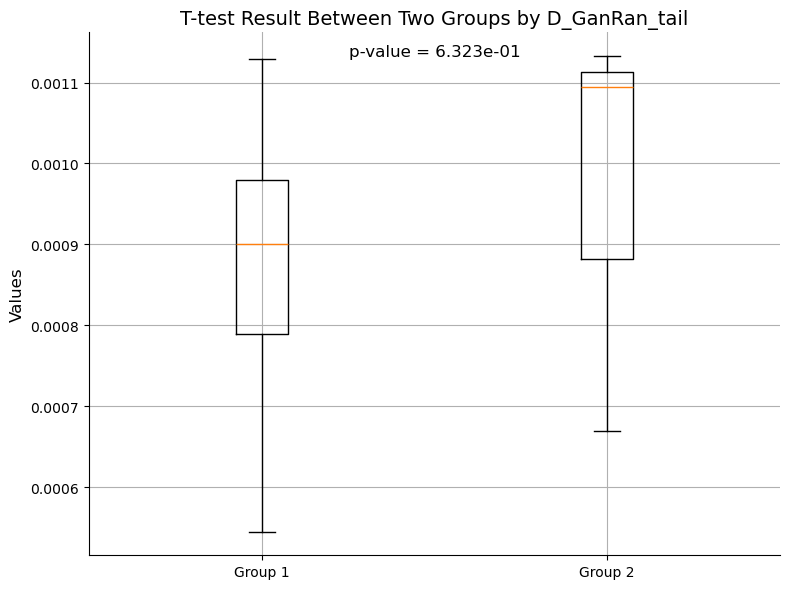

{0: array([[0.00093041, 0.00115262, 0.00109266],
       [0.00054505, 0.00088219, 0.00085687],
       [0.00087102, 0.00076493, 0.00101075],
       [0.00112896, 0.00106984, 0.0012355 ]]), 1: array([[0.00066967, 0.00074452, 0.00085294],
       [0.00113269, 0.0006141 , 0.00070263],
       [0.0010939 , 0.00102251, 0.00096736]])}


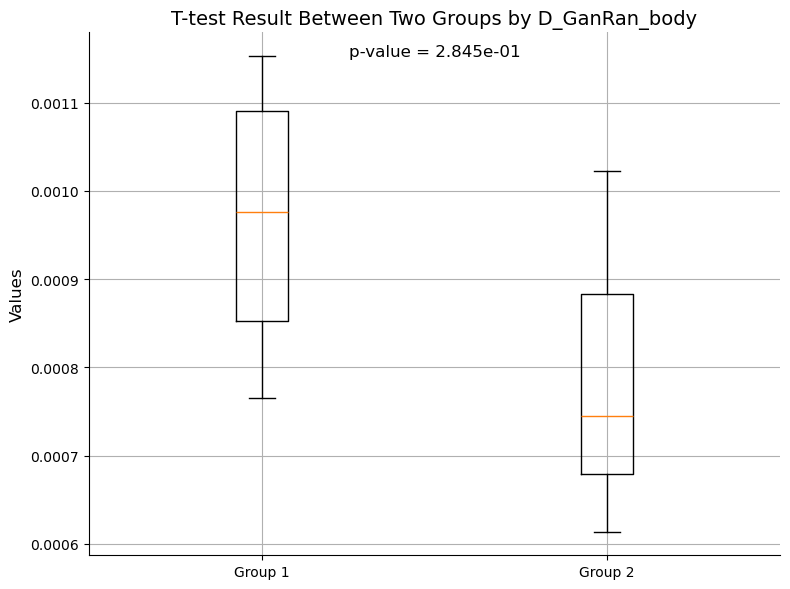

{0: array([[0.00093041, 0.00115262, 0.00109266],
       [0.00054505, 0.00088219, 0.00085687],
       [0.00087102, 0.00076493, 0.00101075],
       [0.00112896, 0.00106984, 0.0012355 ]]), 1: array([[0.00066967, 0.00074452, 0.00085294],
       [0.00113269, 0.0006141 , 0.00070263],
       [0.0010939 , 0.00102251, 0.00096736]])}


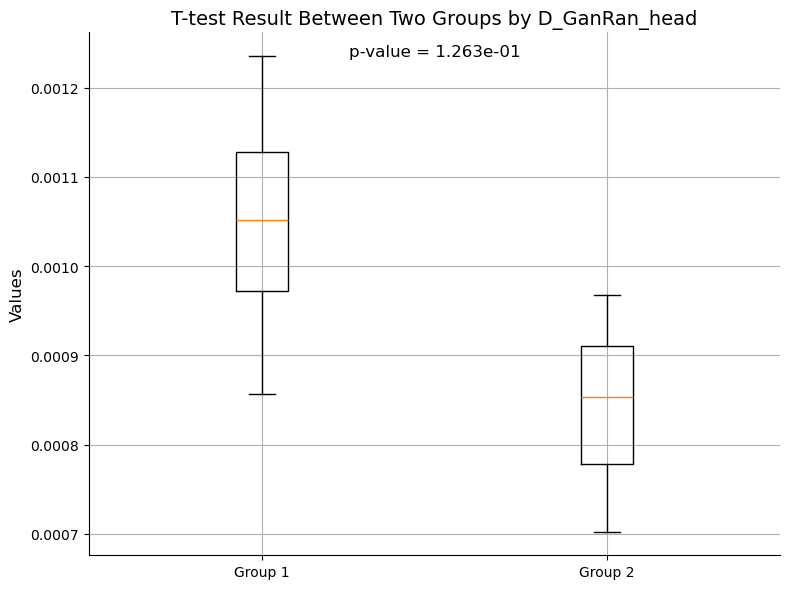

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from ivim_analysis.utils.patient_name_parse import chinese_to_pinyin

def plot_t_test(data1, data2, group_name, fig, ax):
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(data1, data2)

    # Plotting the box plots for two datasets
    ax.boxplot([data1, data2], labels=['Group 1', 'Group 2'])

    # Set title and labels
    ax.set_title(f'T-test Result Between Two Groups by {group_name}', fontsize=14)
    ax.set_ylabel('Values', fontsize=12)

    # Annotate with t-test results
    ax.text(1.5, max(max(data1), max(data2)), f"p-value = {p_value:.3e}", 
            ha='center', fontsize=12)

    # Customize appearance for a professional look
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True)

    # Add horizontal significance bar if p-value is small (optional)
    if p_value < 0.05:
        ax.plot([1, 2], [max(max(data1), max(data2)) + 0.2] * 2, color='black')
        ax.text(1.5, max(max(data1), max(data2)) + 0.3, '*', ha='center', fontsize=16)

ttest_output_dir = os.path.join(output_dir, "ttest")
os.makedirs(ttest_output_dir, exist_ok=True)

for key1, S0_values in values.items():
    for key, value in S0_values.items():
        for i, region in enumerate(list_roi_name):
            # Create a figure
            fig, ax = plt.subplots(figsize=(8, 6))

            print(value)
            data1 = value[0][:, i]
            data2 = value[1][:, i]
            group_name = key1+'_'+chinese_to_pinyin(key)+'_'+region
            plot_t_test(data1, data2, group_name=group_name, fig=fig, ax=ax)

            # Show the plot
            plt.tight_layout()
            plt.show()

            image_path = os.path.join(ttest_output_dir, f"{group_name}.png")
            fig.savefig(image_path)

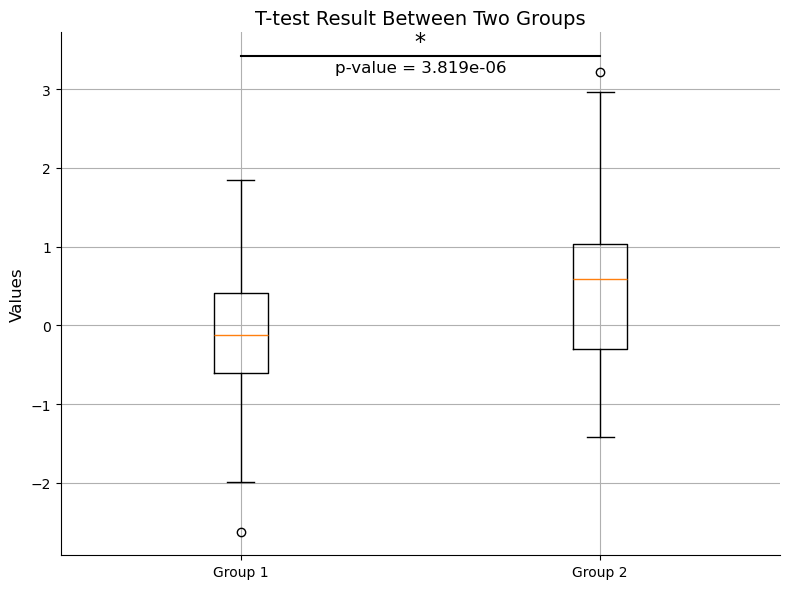

In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy import stats

# # Generate two random datasets for demonstration
# np.random.seed(42)
# data1 = np.random.normal(0, 1, 100)
# data2 = np.random.normal(0.5, 1, 100)

# # Perform t-test
# t_stat, p_value = stats.ttest_ind(data1, data2)

# # Create a figure
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plotting the box plots for two datasets
# ax.boxplot([data1, data2], labels=['Group 1', 'Group 2'])

# # Set title and labels
# ax.set_title('T-test Result Between Two Groups', fontsize=14)
# ax.set_ylabel('Values', fontsize=12)

# # Annotate with t-test results
# ax.text(1.5, max(max(data1), max(data2)), f"p-value = {p_value:.3e}", 
#         ha='center', fontsize=12)

# # Customize appearance for a professional look
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.grid(True)

# # Add horizontal significance bar if p-value is small (optional)
# if p_value < 0.05:
#     ax.plot([1, 2], [max(max(data1), max(data2)) + 0.2] * 2, color='black')
#     ax.text(1.5, max(max(data1), max(data2)) + 0.3, '*', ha='center', fontsize=16)

# # Show the plot
# plt.tight_layout()
# plt.show()


In [72]:
def add_pic_to_slice(prs, image_path, text=""):
    # 添加幻灯片
    slide_layout = prs.slide_layouts[5]  # 使用空白幻灯片布局
    slide = prs.slides.add_slide(slide_layout)

    # 添加图片到幻灯片
    left = Inches(1)
    top = Inches(1)
    height = Inches(5.5)
    # add text to slide
    slide.shapes.placeholders[0].text = text
    slide.shapes.add_picture(image_path, left, top, height=height)

# 创建 PowerPoint 演示文稿
def generate_pptx():
    prs = Presentation()

    add_pic_to_slice(prs, all_pan_with_roi, text="T2 and ADC")

    for i, _ in list_fig_ivim.items():
        base_output_dir = os.path.join(output_dir, i)
            
        pancreas_slice_path = os.path.join(base_output_dir, "pancreas_slice_with_3roi.png")
        add_pic_to_slice(prs, pancreas_slice_path, text=i)

        # use func
        for key in list_roi_name:
            log_b_png = os.path.join(base_output_dir, f"log_b_{key}.png")
            add_pic_to_slice(prs, log_b_png, text=i)

        image_path = os.path.join(base_output_dir, "ivim_params.png")
        add_pic_to_slice(prs, image_path, text=i)

    
    for key1, S0_values in values.items():
        for key, _ in S0_values.items():
            for i, region in enumerate(list_roi_name):
                group_name = key1+'_'+chinese_to_pinyin(key)+'_'+region
                ttest_png = os.path.join(ttest_output_dir, f"{group_name}.png")
                add_pic_to_slice(prs, ttest_png, text=group_name)

    # 保存 PowerPoint 文件
    pptx_path = os.path.join(output_dir, "AP_IVIM.pptx")
    prs.save(pptx_path)

    print(f"PowerPoint 文件已保存到: {pptx_path}")

generate_pptx()


PowerPoint 文件已保存到: ../output/static/AP_IVIM.pptx
